<a href="https://colab.research.google.com/github/DGiulietti/data-driven-prediction-of-battery-cycle-life-before-capacity-degradation/blob/master/Load%20All%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [1]:
! wget https://s3.amazonaws.com/publications.matr.io/1/final_data/FastCharge.zip


--2022-09-19 23:09:42--  https://s3.amazonaws.com/publications.matr.io/1/final_data/FastCharge.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.161.56
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.161.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27946134992 (26G) [application/zip]
Saving to: ‘FastCharge.zip’

FastCharge.zip      100%[===================>]  26.03G  70.1MB/s    in 5m 54s  

2022-09-19 23:15:36 (75.4 MB/s) - ‘FastCharge.zip’ saved [27946134992/27946134992]



In [ ]:
! unzip FastCharge.zip

# Initial Inspection

In [3]:
import json

In [6]:
with open("/content/FastCharge_000000_CH19_structure.json", 'r') as j:
     data = json.loads(j.read())


In [8]:
import pandas as pd

In [12]:
df=pd.DataFrame(data)

In [46]:
df.index

Index(['cycle_index', 'discharge_capacity', 'charge_capacity',
       'discharge_energy', 'charge_energy', 'dc_internal_resistance',
       'temperature_maximum', 'temperature_average', 'temperature_minimum',
       'date_time_iso', 'energy_efficiency', 'charge_throughput',
       'energy_throughput', 'charge_duration', 'time_temperature_integrated',
       'paused', 'voltage', 'current', 'internal_resistance', 'temperature',
       'step_type'],
      dtype='object')

In [13]:
df.columns

Index(['@module', '@class', 'barcode', 'protocol', 'channel_id', 'summary',
       'cycles_interpolated', 'diagnostic_summary', 'diagnostic_interpolated',
       '@version'],
      dtype='object')

In [15]:
df.head(4)

,@module,@class,barcode,protocol,channel_id,summary,cycles_interpolated,diagnostic_summary,diagnostic_interpolated,@version
cycle_index,beep.structure,ProcessedCyclerRun,el150800440551,2017-06-30_tests\20170630-4_4C_55per_6C.sdu,18,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",None,None,2020.10.19.20-8667111
discharge_capacity,beep.structure,ProcessedCyclerRun,el150800440551,2017-06-30_tests\20170630-4_4C_55per_6C.sdu,18,"[1.9345720000000002, 1.0454259, 1.0480373, 1.0...","[1.1768885668964293, 0.9488411090520573, 0.720...",None,None,2020.10.19.20-8667111
charge_capacity,beep.structure,ProcessedCyclerRun,el150800440551,2017-06-30_tests\20170630-4_4C_55per_6C.sdu,18,"[1.4173516000000002, 1.0456483, 1.0484418, 1.0...","[0.6852903643429072, 0.46119085672688037, 0.23...",None,None,2020.10.19.20-8667111
discharge_energy,beep.structure,ProcessedCyclerRun,el150800440551,2017-06-30_tests\20170630-4_4C_55per_6C.sdu,18,"[6.116105999999999, 3.1736647999999996, 3.1761...",NaN,None,None,2020.10.19.20-8667111


In [37]:
print(len(set(df.iloc[1,6])))
print(max(df.iloc[1,6]))
print(min(df.iloc[1,6]))

420165
1.8731750355372456
0.0


In [38]:
print(len(df.iloc[1,5]))
print(max(df.iloc[1,5]))
print(min(df.iloc[1,5]))

491
1.9345720000000002
0.82366771


In [39]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


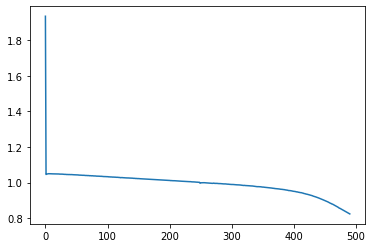

In [49]:
sns.lineplot(df.iloc[0,5], df.iloc[1,5]);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


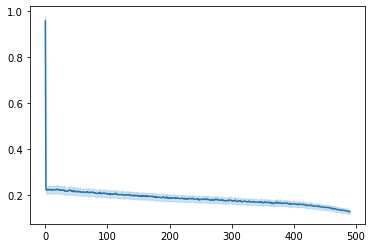

In [50]:
sns.lineplot(df.iloc[0,6], df.iloc[1,6]);

I'm not really sure what the cycle_interpolation is but I think we just want to used summary based on what this notebook contains.

In [52]:
df[['@module', '@class', 'barcode', 'protocol', 'channel_id', 'diagnostic_summary', 'diagnostic_interpolated',
       '@version']].apply(lambda x: print(x.value_counts()), axis=0)

beep.structure    21
Name: @module, dtype: int64
ProcessedCyclerRun    21
Name: @class, dtype: int64
el150800440551    21
Name: barcode, dtype: int64
2017-06-30_tests\20170630-4_4C_55per_6C.sdu    21
Name: protocol, dtype: int64
18    21
Name: channel_id, dtype: int64
Series([], Name: diagnostic_summary, dtype: int64)
Series([], Name: diagnostic_interpolated, dtype: int64)
2020.10.19.20-8667111    21
Name: @version, dtype: int64


@module                    None
@class                     None
barcode                    None
protocol                   None
channel_id                 None
diagnostic_summary         None
diagnostic_interpolated    None
@version                   None
dtype: object

# Loading Everything

In [ ]:
import glob

files_to_process = glob.glob("/content/*.json")
files_to_process

In [119]:
meta = pd.DataFrame()
data_dict = {}
for fp in files_to_process:
  with open(fp, 'r') as j:
     d = json.loads(j.read())
  df=pd.DataFrame(d)
  meta_row = df.loc["cycle_index",['@module', '@class', 'barcode', 'protocol', 'channel_id', '@version']]
  meta_row["filename"] = fp
  meta = meta.append(meta_row, ignore_index=True)
  data = df.loc[:,['summary']]
  data = data.dropna()
  data = pd.DataFrame(data.summary.tolist(), index= data.index).T.set_index("cycle_index")
  data_dict[fp] = data

# Meta Data Exploration

In [120]:
meta

,@module,@class,barcode,protocol,channel_id,@version,filename
0,beep.structure,ProcessedCyclerRun,el150800460641,2017-06-30_tests\20170630-5_2C_58per_4C.sdu,33.0,2020.10.19.20-8667111,/content/FastCharge_000072_CH34_structure.json
1,beep.structure,ProcessedCyclerRun,EL150800460630,2017-05-12_TESTS\20170512-6C-40PER_3C.SDU,24.0,2020.8.21-6702566,/content/FastCharge_000066_CH25_structure.json
2,beep.structure,ProcessedCyclerRun,EL150800460659,2017-05-12_TESTS\20170512-6C-40PER_3_6C.SDU,32.0,2020.6.2-1674d80,/content/FastCharge_000065_CH33_structure.json
3,beep.structure,ProcessedCyclerRun,el150800460513,2017-06-30_tests\20170630-5_6C_65per_3C.sdu,41.0,2020.10.19.20-8667111,/content/FastCharge_000053_CH42_structure.json
4,beep.structure,ProcessedCyclerRun,el150800737314,2018-04-12_batch8\20180412-5_6C_36per_4_3C_new...,20.0,2020.10.19.20-8667111,/content/FastCharge_000012_CH21_structure.json
...,...,...,...,...,...,...,...
135,beep.structure,ProcessedCyclerRun,el150800460526,2017-06-30_tests\20170630-5_6C_5per_4_75C.sdu,40.0,2020.10.19.20-8667111,/content/FastCharge_000052_CH41_structure.json
136,beep.structure,ProcessedCyclerRun,el150800460451,2017-06-30_tests\20170630-3_6C_9per_5C.sdu,15.0,2020.10.19.20-8667111,/content/FastCharge_000043_CH16_structure.json
137,beep.structure,ProcessedCyclerRun,el150800737368,2018-04-12_batch8\20180412-5C_67per_4C_newstru...,33.0,2020.10.19.20-8667111,/content/FastCharge_000002_CH34_structure.json
138,beep.structure,ProcessedCyclerRun,el150800460478,2017-06-30_tests\20170630-4_4C_24per_5C.sdu,16.0,2020.10.19.20-8667111,/content/FastCharge_000016_CH17_structure.json


In [71]:
meta.barcode.str.lower().value_counts()

el150800464865    2
el150800460514    2
el150800460486    2
el150800460623    2
el150800464977    2
                 ..
el150800463871    1
el150800453113    1
el150800737377    1
el150800460631    1
el150800460485    1
Name: barcode, Length: 135, dtype: int64

In [72]:
meta.protocol.str.lower().value_counts()

2018-04-12_batch8\20180412-4_8c_80per_4_8c_newstructure.sdu    8
2018-04-12_batch8\20180412-5_6c_36per_4_3c_newstructure.sdu    8
2018-04-12_batch8\20180412-5c_67per_4c_newstructure.sdu        8
2018-04-12_batch8\20180412-5_6c_19per_4_6c_newstructure.sdu    8
2018-04-12_batch8\20180412-5_3c_54per_4c_newstructure.sdu      8
                                                              ..
2017-06-30_tests\20170630-4_4c_55per_6c.sdu                    1
2017-06-30_tests\20170630-6c_60per_3c.sdu                      1
2017-06-30_tests\20170630-5_6c_47per_4c.sdu                    1
2017-06-30_tests\20170630-5_6c_58per_3_5c.sdu                  1
2017-06-30_tests\20170630-4_4c_24per_5c.sdu                    1
Name: protocol, Length: 72, dtype: int64

In [130]:
meta[["protocol_date","protocol_policy"]]=meta.protocol.str.split("\\", expand=True)

In [78]:
meta.protocol_date.value_counts()

2017-05-12_TESTS     50
2018-04-12_batch8    47
2017-06-30_tests     43
Name: protocol_date, dtype: int64

In [81]:
meta[meta.protocol_policy.str.contains("newstructure")].shape

(47, 9)

In [82]:
meta[~meta.protocol_policy.str.contains("newstructure")].shape

(93, 9)

In [84]:
meta[meta.protocol_date=="2017-06-30_tests"].shape

(43, 9)

In [87]:
meta[(meta.protocol_date=="2017-06-30_tests") & (meta.protocol_policy.str.contains("newstructure"))].shape

(0, 9)

In [88]:
meta[(meta.protocol_date=="2018-04-12_batch8") & (meta.protocol_policy.str.contains("newstructure"))].shape

(47, 9)

In [89]:
meta[(meta.protocol_date=="2017-05-12_TESTS") & (meta.protocol_policy.str.contains("newstructure"))].shape

(0, 9)

In [92]:
meta[(meta.protocol_date=="2018-04-12_batch8")].head(2)

,@module,@class,barcode,protocol,channel_id,@version,filename,protocol_date,protocol_policy
4,beep.structure,ProcessedCyclerRun,el150800737314,2018-04-12_batch8\20180412-5_6C_36per_4_3C_new...,20.0,2020.10.19.20-8667111,/content/FastCharge_000012_CH21_structure.json,2018-04-12_batch8,20180412-5_6C_36per_4_3C_newstructure.sdu
5,beep.structure,ProcessedCyclerRun,el150800737304,2018-04-12_batch8\20180412-5C_67per_4C_newstru...,41.0,2020.10.19.20-8667111,/content/FastCharge_000002_CH42_structure.json,2018-04-12_batch8,20180412-5C_67per_4C_newstructure.sdu


In [139]:
meta.channel_id = pd.to_numeric(meta.channel_id, downcast="integer")

In [142]:
meta = meta.set_index("filename")

In [293]:
meta.columns

Index(['@module', '@class', 'barcode', 'protocol', 'channel_id', '@version',
       'protocol_date', 'protocol_policy'],
      dtype='object')

In [297]:
meta.drop(columns=['@module', '@class','@version', 'protocol'])#.sort_values(by="protocol_date")

,barcode,channel_id,protocol_date,protocol_policy
filename,,,,
/content/FastCharge_000072_CH34_structure.json,el150800460641,33,2017-06-30_tests,20170630-5_2C_58per_4C.sdu
/content/FastCharge_000066_CH25_structure.json,EL150800460630,24,2017-05-12_TESTS,20170512-6C-40PER_3C.SDU
/content/FastCharge_000065_CH33_structure.json,EL150800460659,32,2017-05-12_TESTS,20170512-6C-40PER_3_6C.SDU
/content/FastCharge_000053_CH42_structure.json,el150800460513,41,2017-06-30_tests,20170630-5_6C_65per_3C.sdu
/content/FastCharge_000012_CH21_structure.json,el150800737314,20,2018-04-12_batch8,20180412-5_6C_36per_4_3C_newstructure.sdu
...,...,...,...,...
/content/FastCharge_000052_CH41_structure.json,el150800460526,40,2017-06-30_tests,20170630-5_6C_5per_4_75C.sdu
/content/FastCharge_000043_CH16_structure.json,el150800460451,15,2017-06-30_tests,20170630-3_6C_9per_5C.sdu
/content/FastCharge_000002_CH34_structure.json,el150800737368,33,2018-04-12_batch8,20180412-5C_67per_4C_newstructure.sdu


In [304]:
policy = meta.protocol_policy.apply(lambda x: x[9:-4]).str.rstrip("_newstructure").str.lower()
policy

filename
/content/FastCharge_000072_CH34_structure.json      5_2c_58per_4c
/content/FastCharge_000066_CH25_structure.json        6c-40per_3c
/content/FastCharge_000065_CH33_structure.json      6c-40per_3_6c
/content/FastCharge_000053_CH42_structure.json      5_6c_65per_3c
/content/FastCharge_000012_CH21_structure.json    5_6c_36per_4_3c
                                                       ...       
/content/FastCharge_000052_CH41_structure.json    5_6c_5per_4_75c
/content/FastCharge_000043_CH16_structure.json       3_6c_9per_5c
/content/FastCharge_000002_CH34_structure.json        5c_67per_4c
/content/FastCharge_000016_CH17_structure.json      4_4c_24per_5c
/content/FastCharge_000008_CH47_structure.json      8c-35per_3_6c
Name: protocol_policy, Length: 140, dtype: object

In [309]:
policy =policy.str.split("per_", expand=True)
policy

,0,1
filename,,
/content/FastCharge_000072_CH34_structure.json,5_2c_58,4c
/content/FastCharge_000066_CH25_structure.json,6c-40,3c
/content/FastCharge_000065_CH33_structure.json,6c-40,3_6c
/content/FastCharge_000053_CH42_structure.json,5_6c_65,3c
/content/FastCharge_000012_CH21_structure.json,5_6c_36,4_3c
...,...,...
/content/FastCharge_000052_CH41_structure.json,5_6c_5,4_75c
/content/FastCharge_000043_CH16_structure.json,3_6c_9,5c
/content/FastCharge_000002_CH34_structure.json,5c_67,4c


In [315]:
policy = policy.rename(columns={0:"L",1:"C2"})

In [317]:
policy[["C1","Q1"]] = policy.L.str.split("c", expand=True)

In [319]:
policy = policy.drop(columns=["L"])
policy

,C2,C1,Q1
filename,,,
/content/FastCharge_000072_CH34_structure.json,4c,5_2,_58
/content/FastCharge_000066_CH25_structure.json,3c,6,-40
/content/FastCharge_000065_CH33_structure.json,3_6c,6,-40
/content/FastCharge_000053_CH42_structure.json,3c,5_6,_65
/content/FastCharge_000012_CH21_structure.json,4_3c,5_6,_36
...,...,...,...
/content/FastCharge_000052_CH41_structure.json,4_75c,5_6,_5
/content/FastCharge_000043_CH16_structure.json,5c,3_6,_9
/content/FastCharge_000002_CH34_structure.json,4c,5,_67


In [323]:
policy.C2 = pd.to_numeric(policy.C2.str.rstrip("c").str.replace("_","."))
policy.C1 = pd.to_numeric(policy.C1.str.replace("_","."))
policy.Q1 = pd.to_numeric(policy.Q1.str.lstrip("_-"))
policy = policy[["C1", "Q1", "C2"]]
policy

,C1,Q1,C2
filename,,,
/content/FastCharge_000072_CH34_structure.json,5.2,58,4.00
/content/FastCharge_000066_CH25_structure.json,6.0,40,3.00
/content/FastCharge_000065_CH33_structure.json,6.0,40,3.60
/content/FastCharge_000053_CH42_structure.json,5.6,65,3.00
/content/FastCharge_000012_CH21_structure.json,5.6,36,4.30
...,...,...,...
/content/FastCharge_000052_CH41_structure.json,5.6,5,4.75
/content/FastCharge_000043_CH16_structure.json,3.6,9,5.00
/content/FastCharge_000002_CH34_structure.json,5.0,67,4.00


In [328]:
final_meta = meta.drop(columns=['@module', '@class','@version', 'protocol']).merge(policy, left_index=True, right_index=True).sort_values(by=["protocol_date"])
final_meta.to_csv("./A_meta_data.csv")
final_meta

,barcode,channel_id,protocol_date,protocol_policy,C1,Q1,C2
filename,,,,,,,
/content/FastCharge_000008_CH47_structure.json,EL150800460485,46,2017-05-12_TESTS,20170512-8C-35PER_3_6C.SDU,8.0,35,3.6
/content/FastCharge_000029_CH9_structure.json,EL150800465027,8,2017-05-12_TESTS,20170512-4_8C-80PER_4_8C.SDU,4.8,80,4.8
/content/FastCharge_000019_CH30_structure.json,EL150800460436,29,2017-05-12_TESTS,20170512-6C-60PER_3C.SDU,6.0,60,3.0
/content/FastCharge_000048_CH44_structure.json,EL150800460647,43,2017-05-12_TESTS,20170512-8C-15PER_3_6C.SDU,8.0,15,3.6
/content/FastCharge_000026_CH5_structure.json,EL150800464977,4,2017-05-12_TESTS,20170512-4C-80PER_4C.SDU,4.0,80,4.0
...,...,...,...,...,...,...,...
/content/FastCharge_000012_CH45_structure.json,el150800737365,44,2018-04-12_batch8,20180412-5_6C_36per_4_3C_newstructure.sdu,5.6,36,4.3
/content/FastCharge_000015_CH20_structure.json,el150800737276,19,2018-04-12_batch8,20180412-5_6C_19per_4_6C_newstructure.sdu,5.6,19,4.6
/content/FastCharge_000015_CH36_structure.json,el150800737287,35,2018-04-12_batch8,20180412-5_6C_19per_4_6C_newstructure.sdu,5.6,19,4.6


In [327]:
! pwd

/content


# Run Data Exploration

In [125]:
data_dict["/content/FastCharge_000072_CH34_structure.json"]

,discharge_capacity,charge_capacity,discharge_energy,charge_energy,dc_internal_resistance,temperature_maximum,temperature_average,temperature_minimum,date_time_iso,energy_efficiency,charge_throughput,energy_throughput,charge_duration,time_temperature_integrated,paused
cycle_index,,,,,,,,,,,,,,,
0,1.968019,1.450042,6.232803,4.784957,0.030048,33.801735,30.271198,24.935591,2017-07-01T03:58:56+00:00,1.302583,1.450042,4.784957,33024.0,39202.165377,0
1,1.075889,1.075779,3.279834,3.746918,0.017711,36.337837,32.858318,30.670738,2017-07-02T01:36:00+00:00,0.875342,2.525821,8.531876,640.0,2028.519515,0
2,1.079052,1.0789,3.285678,3.750352,0.017695,35.5625,32.470284,30.02273,2017-07-02T02:37:52+00:00,0.876099,3.604721,12.282228,512.0,1938.995089,0
3,1.079789,1.080898,3.292782,3.757467,0.017686,36.342033,32.90757,30.620964,2017-07-02T03:37:36+00:00,0.87633,4.685618,16.039694,512.0,1962.60553,0
4,1.081907,1.081935,3.299445,3.758799,0.017553,36.423939,33.094589,30.771761,2017-07-02T04:37:20+00:00,0.877792,5.767554,19.798494,640.0,1972.331616,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,0.832752,0.835261,2.356498,2.974607,0.022071,38.934872,34.528015,30.902069,2017-07-24T20:26:40+00:00,0.792205,568.198425,1988.864502,NaN,2033.734355,0
544,0.830412,0.833154,2.348395,2.96681,0.02213,38.666843,34.48867,30.418114,2017-07-24T21:26:24+00:00,0.791556,569.031616,1991.831299,NaN,1954.928239,0
545,0.828325,0.82921,2.340671,2.954182,0.022238,39.010265,34.093014,30.246161,2017-07-24T22:24:00+00:00,0.792324,569.860779,1994.7854,NaN,2009.959367,0


In [127]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'Discharge Capacity (Ah)')

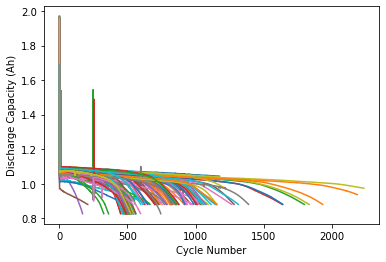

In [152]:
for df in data_dict.values():
    plt.plot(df.iloc[:-1].index, df.iloc[:-1]['discharge_capacity'])
plt.xlabel('Cycle Number')
plt.ylabel('Discharge Capacity (Ah)')

## Removing suspect runs as mentioned in the original code base and on the website

In [189]:
batch1 = "2018-04-12_batch8"
batch2 = "2017-05-12_TESTS"
batch3 = "2017-06-30_tests"

### Batch 1 : 2018-04-12

**Experimental design**

All cells were cycled with two-step charging policies. The charging time fixed at 10 minutes (0-80% SOC). We test multiple cells per policy (3-8x per policy).
We cycle to 80% of nominal capacity (0.88 Ah).
Four 5-second rests were placed after reaching 80% SOC during charging, after the IR test, before discharging, and after discharging.
A final C/10 cycle was performed at 80% of nominal capacity.
The cutoff currents for the constant-voltage steps were C/20 for both charge and discharge.
The pulse width of the IR test is 33 ms.

**Experimental notes**

Some cells had OCV errors (caused by the internal resistance test) that lead to temporary pauses in cycling.

**Data notes**

The tests in channels 33 and 41 were terminated before the cells reached 80% of nominal capacity.
The cell in channel 46 has noisy voltage profiles, likely due to an electronic connection error.

In [206]:
# remove batteries that do not reach 80% capacity
  # del batch1['b1c8']
  # del batch1['b1c10']
  # del batch1['b1c12']
  # del batch1['b1c13']
  # del batch1['b1c22']

# THESE CELL IDs DON'T MATCH WHAT THE PAPER MENTIONS
# CELLS ARE INDEXED FROM 0 IN THE CODE AND 1 IN THE PAPER

# b1_chan_ids = [33, 41, 46]
b1_chan_ids = [32, 40, 45]


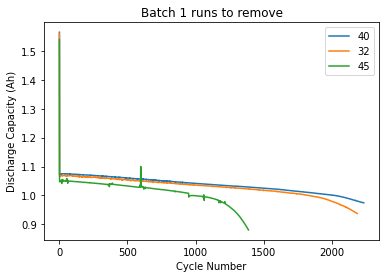

In [207]:
l = []
for run in data_dict:
    if (meta.loc[run,"protocol_date"] == batch1 and meta.loc[run, "channel_id"] in b1_chan_ids):
      plt.plot(data_dict[run].iloc[:-1].index, data_dict[run].iloc[:-1]['discharge_capacity'])
      l.append(meta.loc[run, "channel_id"])
plt.title('Batch 1 runs to remove')
plt.xlabel('Cycle Number')
plt.ylabel('Discharge Capacity (Ah)')
plt.legend(l);

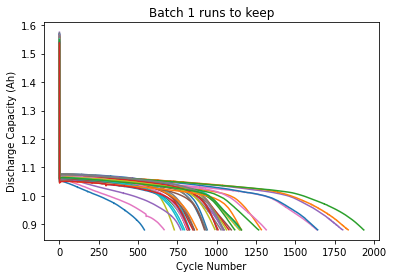

In [201]:
for run in data_dict:
    if (meta.loc[run,"protocol_date"] == batch1 and not meta.loc[run, "channel_id"] in b1_chan_ids):
      plt.plot(data_dict[run].iloc[:-1].index, data_dict[run].iloc[:-1]['discharge_capacity'])
plt.title('Batch 1 runs to keep')
plt.xlabel('Cycle Number')
plt.ylabel('Discharge Capacity (Ah)');

In [203]:
m = []
for run in data_dict:
    if (meta.loc[run,"protocol_date"] == batch1 and not meta.loc[run, "channel_id"] in b1_chan_ids):
      m.append(data_dict[run].iloc[:-1]['discharge_capacity'].min())
print(m)

[0.88080788, 0.88079751, 0.88024569, 0.88002509, 0.88001466, 0.88094068, 0.88014877, 0.88023561, 0.88003904, 0.88007373, 0.88037544, nan, 0.88013124, 0.88059181, 0.88047254, 0.88011736, 0.88043362, 0.88065648, 0.88031369, 0.88094097, 0.88046378, 0.88036358, 0.88058406, 0.88064086, 0.8801114, 0.88007307, 0.88088632, 0.88024825, 0.8802734, 0.88062328, 0.88158864, 0.88058048, 0.88000458, 0.8804329, 0.8801983, 0.88060242, 0.88113368, 0.88060749, 0.88167018, 0.88070726, 0.88010961, 0.88043225, 0.88017184, 0.88021326]


Could not validate claim about not reaching 80%. All runs appeard to be well above 80% discharge capacity. What is meant by "nominal capacity"?

### Batch 2: 2017-05-12

**Experimental design**

All cells were cycled with one-step or two-step charging policies. The charging time varies from ~8 to 13.3 minutes (0-80% SOC). There are generally two cells tested per policy, with the exception of 3.6C(80%).
1 minute and 1 second rests were placed after reaching 80% SOC during charging and after discharging, respectively.
We cycle to 80% of nominal capacity (0.88 Ah).
An initial C/10 cycle was performed in the beginning of each test.
The cutoff currents for the constant-voltage steps were C/50 for both charge and discharge.
The pulse width of the IR test is 30 ms.

**Experimental notes**

The computer automatically restarted twice. As such, there are some time gaps in the data.
The temperature control is somewhat inconsistent, leading to variability in the baseline chamber temperature.
The tests in channels 4 and 8 did not successfully start and thus do not have data.
The thermocouples for channels 15 and 16 were accidentally switched.

**Data notes**

Cycle 1 data is not available in the struct. The sampling rate for this cycle was initially too high, so we excluded it from the data set to create more manageable file sizes.
The cells in Channels 1, 2, 3, 5, and 6 (3.6C(80%) and 4C(80%) policies) were stopped at the end of this batch and resumed in the 2017-06-30 batch. This pause in cycling lead to a rise in capacity upon resuming the tests.
The tests in channels 13, 19, 21, 22, and 31 were terminated before the cells reached 80% of nominal capacity.

In [224]:
# Batch 2: 2017-05-12
b2_t_switch = [15,14]
b2_chan_ids = [3,7,12, 18, 20, 21, 30] # first 2 are no start, rest is terminated before the cells reached 80% of nominal capacity
b2_resume_b3_chan_ids = [0, 1, 2, 4, 5]



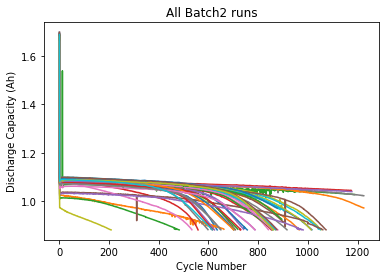

In [212]:
for run in data_dict:
    if (meta.loc[run,"protocol_date"] == batch2):
      plt.plot(data_dict[run].iloc[:-1].index, data_dict[run].iloc[:-1]['discharge_capacity'])
plt.title("All Batch2 runs")
plt.xlabel('Cycle Number')
plt.ylabel('Discharge Capacity (Ah)');

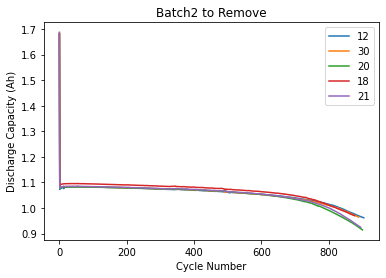

In [222]:
l = []
for run in data_dict:
    if (meta.loc[run,"protocol_date"] == batch2 and meta.loc[run, "channel_id"] in b2_chan_ids):
      plt.plot(data_dict[run].iloc[:-1].index, data_dict[run].iloc[:-1]['discharge_capacity'])
      l.append(meta.loc[run, "channel_id"])
plt.title("Batch2 to Remove")
plt.xlabel('Cycle Number')
plt.ylabel('Discharge Capacity (Ah)')
plt.legend(l);

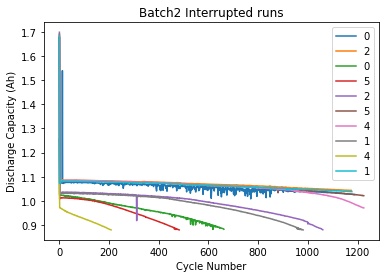

In [225]:
l = []
for run in data_dict:
    if (meta.loc[run,"protocol_date"] == batch2 and meta.loc[run, "channel_id"] in b2_resume_b3_chan_ids):
      plt.plot(data_dict[run].iloc[:-1].index, data_dict[run].iloc[:-1]['discharge_capacity'])
      l.append(meta.loc[run, "channel_id"])
plt.title("Batch2 Interrupted runs")
plt.xlabel('Cycle Number')
plt.ylabel('Discharge Capacity (Ah)')
plt.legend(l);

the corresponded data landed in the correct batch but it would need to be stitched together. Runs associated with cell 0 look noisy, may not want to use.
May not want to use any of the stitched together data or just treat them as separate runs. Would this still be valuable if the discharge capacity did not start at 1.9?

### Batch 3: 2017-06-30

**Experimental design**

All cells were cycled with one-step or two-step charging policies. The charging time is fixed at 10 minutes (0-80% SOC). There is generally only one cell tested per policy, with the exception of 4.8C(80%) (three cells).
We resumed 5 cells from the 2017-05-12 batch that didn’t complete yet - 3.6C and 4.0C.
We cycle to 75% of nominal capacity (0.88 Ah).
5 minute rests were placed both after reaching 80% SOC during charging and after discharging.
An initial C/10 cycle was performed in the beginning of each test.
The cutoff currents for the constant-voltage steps were C/50 for both charge and discharge.
The pulse width of the IR test is 30 ms.

**Experimental notes**

The computer automatically restarted, affecting all tests (around cycle 250 for most policies). There are some ‘spikes’ in capacity. This effectively lead to around an 8-hour ‘rest’.
The computer also restarted near the end of the tests, with one cell (Channel 3, EL150800460623) affected (expect a ‘spike’ near the end of life).
Upon unloading the cells, we noticed the thermocouples from channels 7 and 21 had fallen off the cell.
The thermocouples for channels 15 and 16 were accidentally switched.

**Data notes**

3.6C(80%) and 4C(80%) policies have data that carry over from batch 1* (link on barcode). This applies to the cells in channels 1, 2, 3, 5, and 6. Please note that these are NOT new experiments, but a continuation of experiments from the 2017-05-12 batch.
Channel 10 (EL150800460605), dies quite quickly. This cell is possibly defective, although we detected no obvious signs of this.

*DG note: I think he means batch 2

In [287]:
meta.barcode.value_counts().head(8)

EL150800464865    2
EL150800460514    2
EL150800460486    2
EL150800460623    2
EL150800464977    2
EL150800460522    1
el150800460602    1
el150800737334    1
Name: barcode, dtype: int64

In [292]:
meta[meta.barcode.isin(list(meta.barcode.value_counts().head(5).index))][["barcode","protocol", "channel_id"]].sort_values(by="barcode") # yes, these are all together in 1 batch

,barcode,protocol,channel_id
filename,,,
/content/FastCharge_000004_CH2_structure.json,EL150800460486,2017-05-12_TESTS\20170512-3_6C-80PER_3_6C.SDU,1
/content/FastCharge_000045_CH2_structure.json,EL150800460486,2017-05-12_TESTS\20170512-3_6C-80PER_3_6C.SDU,1
/content/FastCharge_000045_CH1_structure.json,EL150800460514,2017-05-12_TESTS\20170512-3_6C-80PER_3_6C.SDU,0
/content/FastCharge_000004_CH1_structure.json,EL150800460514,2017-05-12_TESTS\20170512-3_6C-80PER_3_6C.SDU,0
/content/FastCharge_000045_CH3_structure.json,EL150800460623,2017-05-12_TESTS\20170512-3_6C-80PER_3_6C.SDU,2
/content/FastCharge_000004_CH3_structure.json,EL150800460623,2017-05-12_TESTS\20170512-3_6C-80PER_3_6C.SDU,2
/content/FastCharge_000026_CH6_structure.json,EL150800464865,2017-05-12_TESTS\20170512-4C-80PER_4C.SDU,5
/content/FastCharge_000063_CH6_structure.json,EL150800464865,2017-05-12_TESTS\20170512-4C-80PER_4C.SDU,5
/content/FastCharge_000063_CH5_structure.json,EL150800464977,2017-05-12_TESTS\20170512-4C-80PER_4C.SDU,4


In [279]:
# Batch3: 2017-06-30
b3_t_switch = [15,14]
b3_no_t = [6,20]
b3_defective = [9]
# b3_chan_ids = [37,2,23,32,42,43] # reported as noisy in source code

b3_chan_ids =[44, 27, 12, 15, 26, 14, 37, 21, 24, 19, 42, 18]

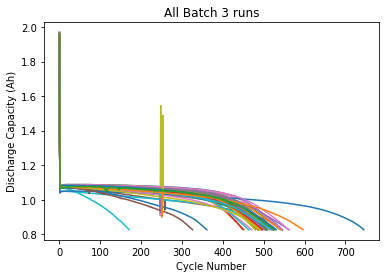

In [264]:

for run in data_dict:
    if (meta.loc[run,"protocol_date"] == batch3):
      plt.plot(data_dict[run].iloc[:-1].index, data_dict[run].iloc[:-1]['discharge_capacity'])

plt.title("All Batch 3 runs")
plt.xlabel('Cycle Number')
plt.ylabel('Discharge Capacity (Ah)');

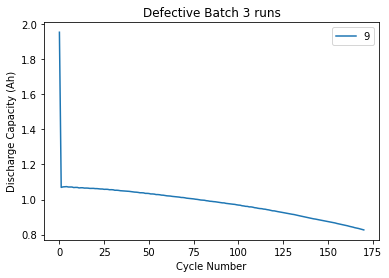

In [265]:
l = []
for run in data_dict:
    if (meta.loc[run,"protocol_date"] == batch3 and meta.loc[run, "channel_id"] in b3_defective):
      plt.plot(data_dict[run].iloc[:-1].index, data_dict[run].iloc[:-1]['discharge_capacity'])
      l.append(meta.loc[run, "channel_id"])
plt.title("Defective Batch 3 runs")
plt.xlabel('Cycle Number')
plt.ylabel('Discharge Capacity (Ah)')
plt.legend(l);

Oh yeah, very few cycles until discharge.

I didn't feel that the noise expressed in the source code corresponded to anything notable. So I focused on the blip between 200 and 300 cycles and filtered out curves with a significant spike up and down.

In [252]:
m = []
for run in data_dict:
    if (meta.loc[run,"protocol_date"] == batch3):
      m.append((meta.loc[run,"channel_id"], data_dict[run].iloc[200:300]['discharge_capacity'].min())) # also checked max
sorted(m, key=lambda x: x[1]) # 44, 27, 12, 16, 11, 14, 37, 21, 24, 19, 42, 18

[(8, 0.88159466),
 (15, 0.89948249),
 (12, 0.90786719),
 (26, 0.90870988),
 (11, 0.92371541),
 (14, 0.94029099),
 (37, 0.94319415),
 (21, 0.94565272),
 (24, 0.95257086),
 (19, 0.96377116),
 (42, 0.97584051),
 (18, 0.98937511),
 (27, 0.99884367),
 (28, 1.0165552),
 (17, 1.0178832),
 (47, 1.0265777),
 (6, 1.0293771),
 (10, 1.0349157),
 (7, 1.0358611),
 (23, 1.03715),
 (20, 1.0389606),
 (35, 1.0398695),
 (41, 1.0401804000000001),
 (30, 1.0422274999999999),
 (13, 1.0426881),
 (16, 1.0438991),
 (22, 1.044337),
 (40, 1.0444626000000001),
 (45, 1.0453019000000001),
 (3, 1.046964),
 (25, 1.0474318999999999),
 (43, 1.0493958),
 (38, 1.0511163000000001),
 (29, 1.0524485000000001),
 (44, 1.0532678),
 (46, 1.0535636999999998),
 (31, 1.0559882999999999),
 (34, 1.0578086000000002),
 (39, 1.062699),
 (32, 1.0632612),
 (36, 1.0665576),
 (33, 1.0685841999999999),
 (9, nan)]

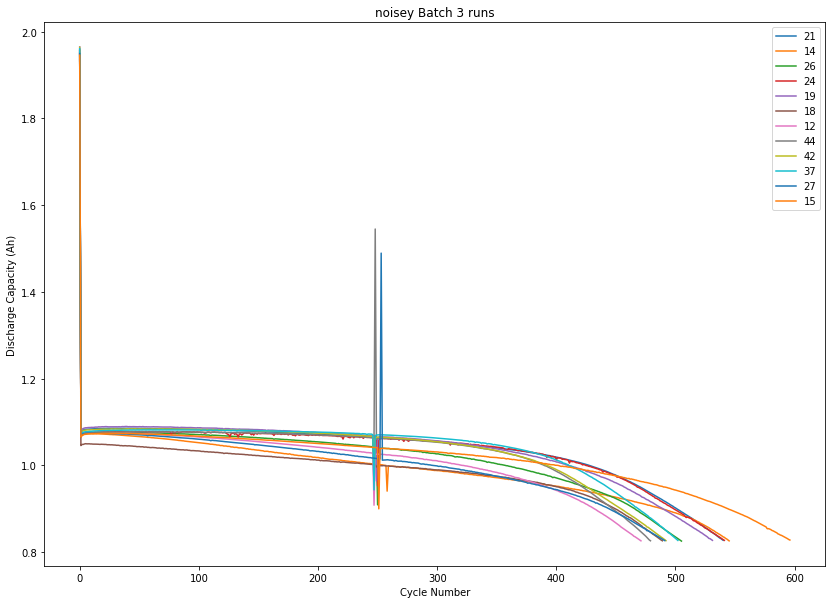

In [280]:
l = []
for run in data_dict:
    if (meta.loc[run,"protocol_date"] == batch3 and meta.loc[run, "channel_id"] in b3_chan_ids):
      plt.plot(data_dict[run].iloc[:-1].index, data_dict[run].iloc[:-1]['discharge_capacity'])
      l.append(meta.loc[run, "channel_id"])
plt.title("noisey Batch 3 runs")
plt.xlabel('Cycle Number')
plt.ylabel('Discharge Capacity (Ah)')
plt.legend(l)
plt.gcf().set_size_inches(14, 10);

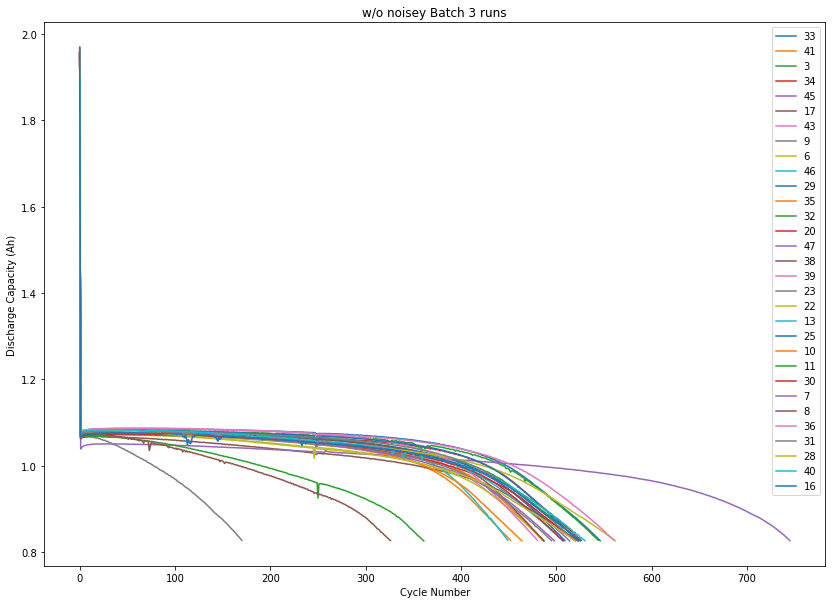

In [273]:
l = []
for run in data_dict:
    if (meta.loc[run,"protocol_date"] == batch3 and not meta.loc[run, "channel_id"] in b3_chan_ids):
      plt.plot(data_dict[run].iloc[:-1].index, data_dict[run].iloc[:-1]['discharge_capacity'])
      l.append(meta.loc[run, "channel_id"])
plt.title("w/o noisey Batch 3 runs")
plt.xlabel('Cycle Number')
plt.ylabel('Discharge Capacity (Ah)')
plt.legend(l)
plt.gcf().set_size_inches(14, 10);

There may still be some curves in there with noise. Peraps with runs with the spikes are not actually the issue but the runs with many small pertibations are a problem?

### Final Summary

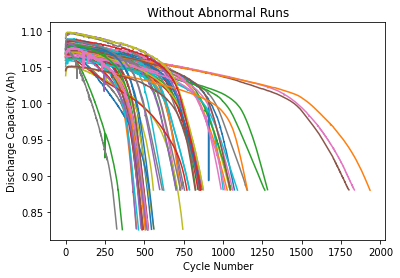

In [281]:
super_list = b1_chan_ids + b2_chan_ids + b2_resume_b3_chan_ids + b3_defective + b3_chan_ids
for run in data_dict:
    if not meta.loc[run, "channel_id"] in super_list:
      plt.plot(data_dict[run].iloc[1:-1].index, data_dict[run].iloc[1:-1]['discharge_capacity'])

plt.xlabel('Cycle Number')
plt.ylabel('Discharge Capacity (Ah)')
plt.title("Without Abnormal Runs");

it looks like batch 3 data did actually go close to 80%; the rest did not.

# Old Source Code

In [ ]:
batch1 = pickle.load(open(r'.\Data\batch1.pkl', 'rb'))
#remove batteries that do not reach 80% capacity
del batch1['b1c8']
del batch1['b1c10']
del batch1['b1c12']
del batch1['b1c13']
del batch1['b1c22']



In [ ]:
numBat1 = len(batch1.keys())
numBat1

41

In [ ]:
batch2 = pickle.load(open(r'.\Data\batch2.pkl','rb'))

In [ ]:
# There are four cells from batch1 that carried into batch2, we'll remove the data from batch2
# and put it with the correct cell from batch1
batch2_keys = ['b2c7', 'b2c8', 'b2c9', 'b2c15', 'b2c16']
batch1_keys = ['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4']
add_len = [662, 981, 1060, 208, 482];

In [ ]:
for i, bk in enumerate(batch1_keys):
    batch1[bk]['cycle_life'] = batch1[bk]['cycle_life'] + add_len[i]
    for j in batch1[bk]['summary'].keys():
        if j == 'cycle':
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j] + len(batch1[bk]['summary'][j])))
        else:
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j]))
    last_cycle = len(batch1[bk]['cycles'].keys())
    for j, jk in enumerate(batch2[batch2_keys[i]]['cycles'].keys()):
        batch1[bk]['cycles'][str(last_cycle + j)] = batch2[batch2_keys[i]]['cycles'][jk]

In [ ]:
del batch2['b2c7']
del batch2['b2c8']
del batch2['b2c9']
del batch2['b2c15']
del batch2['b2c16']

In [ ]:
numBat2 = len(batch2.keys())
numBat2

43

In [ ]:
batch3 = pickle.load(open(r'.\Data\batch3.pkl','rb'))
# remove noisy channels from batch3
del batch3['b3c37']
del batch3['b3c2']
del batch3['b3c23']
del batch3['b3c32']
del batch3['b3c42']
del batch3['b3c43']

In [ ]:
numBat3 = len(batch3.keys())
numBat3

40

In [ ]:
numBat = numBat1 + numBat2 + numBat3
numBat

124

In [ ]:
bat_dict = {**batch1, **batch2, **batch3}

Text(0, 0.5, 'Discharge Capacity (Ah)')

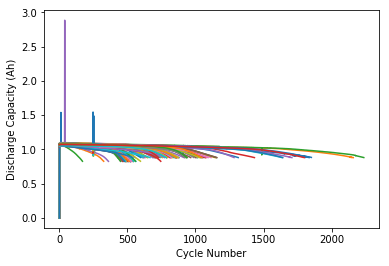

In [ ]:
for i in bat_dict.keys():
    plt.plot(bat_dict[i]['summary']['cycle'], bat_dict[i]['summary']['QD'])
plt.xlabel('Cycle Number')
plt.ylabel('Discharge Capacity (Ah)')

### Train and Test Split
If you are interested in using the same train/test split as the paper, use the indices specified below

In [ ]:
test_ind = np.hstack((np.arange(0,(numBat1+numBat2),2),83))
train_ind = np.arange(1,(numBat1+numBat2-1),2)
secondary_test_ind = np.arange(numBat-numBat3,numBat);